# DataCamp Mobil Oyun A/B Testi

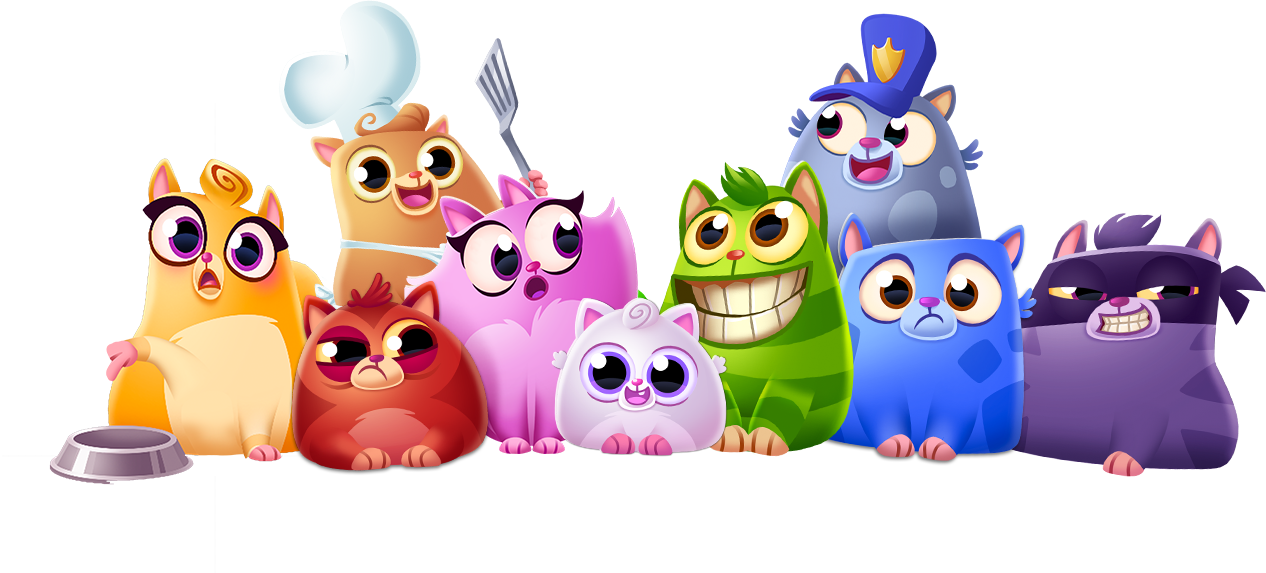

In [430]:
from PIL import Image
img = Image.open('cookie-cats.png')
img

- Cookie Cats, Tactile Entertainment tarafından geliştirilen oldukça popüler bir mobil bulmaca oyunudur. Oyun videosuna [buradan](https://www.youtube.com/watch?v=GaP5f0jVTWE) ulaşabilirsiniz. Oyuncunun tahtayı temizlemek ve seviyeyi kazanmak için şarkı söyleyen tatlı kediler eşliğinde aynı renkteki karoları birleştirmesi gereken klasik üçlü birleştir tarzı bir bulmaca oyunudur. Oyuncular oyunda ilerledikçe, ilerlemeden veya uygulama içi satın alma işlemi yapmadan önce onları bir süre beklemeye zorlayan kapılarla karşılaşacaklar. Bu projede, Cookie Cats'deki ilk geçidin 30. seviyeden 40. seviyeye taşındığı bir A/B testinin sonucunu analiz edeceğiz. Özellikle, oyuncu tutma ve oyun turları üzerindeki etkisini analiz edeceğiz.
Oyuncular oyunun seviyelerinde ilerledikçe, bazen onları önemsiz olmayan bir süre beklemeye veya ilerlemek için uygulama içi satın alma yapmaya zorlayan kapılarla karşılaşacaklar. Uygulama içi satın alımları artırmanın yanı sıra, bu kapılar, oyunculara oyunu oynamaktan zorunlu bir ara verme gibi önemli bir amaca hizmet eder ve oyuncunun oyundan zevk almasının artması ve oynama süresinin uzamasıyla sonuçlanması amaçlanmaktadır.


- Bahsi geçen kapılar nereye yerleştirilmelidir? Başlangıçta ilk kapı 30. seviyeye yerleştirilmiştir. Bu projede, Cookie Cats'deki ilk kapıyı 30. seviyeden 40. seviyeye taşıdığımız bir A/B testini analiz edeceğiz.

Veriler, oyunu yükleyen 90.189 oyuncudan alınmıştır. Değişkenler şunlardır:

- **userid** - her oyuncuyu tanımlayan benzersiz numaraları gösterir.
- **version** - oyuncunun kontrol grubuna (gate_30 - seviye 30'daki kapı) veya test grubuna (gate_40 - seviye 40'taki kapı) yerleştirilmiş olup olmadığını gösterir.
- **sum_gamerounds** - kurulumdan sonraki ilk hafta boyunca oyuncunun oynadığı oyun turlarının sayısı
- **retention_1** - oyuncu, oyunu yükledikten 1 gün sonra geri gelip tekrar oynayıp oynamadığı durumunu gösterir.
- **retention_7** - oyuncu, oyunu yükledikten 7 gün sonra geri gelip tekrar oynayıp oynamadığı durumunu gösterir.


## A/B Testi Adımları

1. **Normallik Varsayımı Kontrolü:** Test yönteminin seçimi için gerekli varsayımlardan biridir. Shapiro Wilks testi ile grupların normal dağılım gösterip göstermediği anlaşılabilir. Test sonucuna göre Bağımsız İki Örneklem T Testi ve Mann Whitney U Testi arasından tercih yapılır. Testin p-value değeri 0.05'den büyükse Bağımsız İki Örneklem T Testi uygulancaktır. 

2. **Varyans Homojenliği Varsayımı Kontrolü:** Normallik varsayımı sağlanıyorsa bir diğer varsayım olan varyans homojenliği test edilir. Levene testi ile varyans homojenliği anlaşılabilir. Test sonucunda p-value değeri 0.05'den küçük homojen olmadığı anlamına gelir ve A/B Testi, Non-Parametrik yöntem olan Mann Whitney U Testi ile gerçekleştirilecektir.


**Veri Setinin Yüklenmesi**

In [409]:
import pandas as pd
data = pd.read_csv('cookie_cats.csv')
df = data.copy()
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Betimsel İstatistikler**

In [410]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,90189.0,4.998412e+06,2.883286e+06,116.0,2512230.0,4995815.0,7496452.0,9999861.0
sum_gamerounds,90189.0,5.187246e+01,1.950509e+02,0.0,5.0,16.0,51.0,49854.0


In [411]:
df.describe()[['sum_gamerounds']] #Serinin minimum değerinin 0 maksimum değerinin 49854 olması ve ortamasının 51 civarlarında gözükmesi bize aykırı bir değerin olabiliceğini gösteriyor. Maksimumum değer aykırı bir değerdir

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


**Eksik ve Aykırı Değer Kontrolü**

In [412]:
df.isnull().sum() #Eksik verimiz yok.

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

49854


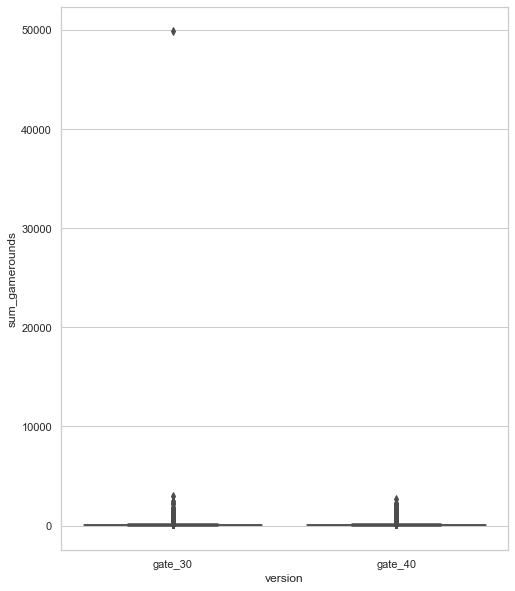

In [413]:
# Aykırı değerleri temizlemeden önce
plt.figure(figsize=(8,10))
sns.boxplot(x='version', y= 'sum_gamerounds', data=df)
print(df['sum_gamerounds'].max())

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

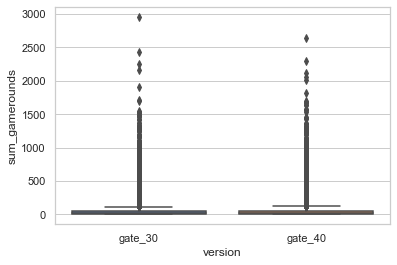

In [414]:
# Aykırı değerleri temizlikten sonra 
df = df[df.sum_gamerounds < df.sum_gamerounds.max()]
sns.boxplot(x='version', y= 'sum_gamerounds', data=df)

In [415]:
# Kaç oyuncumuz var?
df['userid'].count()

90188

In [416]:
# Her iki grubta kaçar tane oyuncu mevcut?
df.groupby('version').count()[['userid']]

,userid
version,
gate_30,44699
gate_40,45489


In [417]:
df_plot = df.groupby('sum_gamerounds')[['userid']].count()
df_plot

,userid
sum_gamerounds,
0,3994
1,5538
2,4606
3,3958
4,3629
...,...
2251,1
2294,1
2438,1


Text(0, 0.5, 'Oyuncu Sayısı')

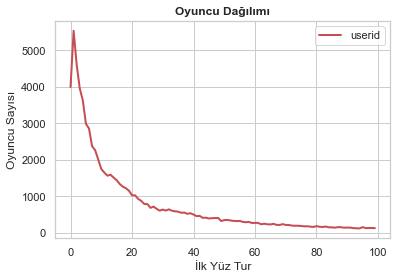

In [419]:
# Oyuncuların oyunu indirdikten sonra 1 haftaki süreçte oynadıkları tur sayıları
sns.set_theme(style="whitegrid")
df_plot = df.groupby('sum_gamerounds')[['userid']].count()
df_plot.head(100).plot(linewidth=2, c='r')
plt.title('Oyuncu Dağılımı',fontweight = 'bold', size=12)
plt.xlabel('İlk Yüz Tur')
plt.ylabel('Oyuncu Sayısı')

Oyuncular, tur sayıları ilerledikçe oyunu bırakmaya meyilli gözüküyorlar. İlk 100 tura baktığımızda gittikçe azalan oyuncu sayılarını gözlemlemekteyiz. Bunların birçok sebepleri olabilir. Oyunu bir süre sonra beğenmeyen, bölüm geçtikçe zorlukların artmasıyla sıkılıp bırakan, zamanları olmadığı için oynayaman vb. gibi kullanıcıların durumları gözlenmeli ve buna bağlı olarak oyun içerisinde ilgi çekici ödüller veya zaman ayarlamaları yapılmalıdır.

In [424]:
df[df['sum_gamerounds'] == 0].count()['userid'] #Oyunu indirdikten son hiç oyun oynamayan oyuncu sayısı

3994

In [420]:
df_retention = df.groupby('version')[['retention_1','retention_7']].mean()*100 #Her gruptaki oyuncuların 1 ve 7 haftalık dilimlerde oyuna tekrar geri dönme oranları
df_retention

,retention_1,retention_7
version,,
gate_30,44.819795,19.018323
gate_40,44.228275,18.200004


In [421]:
print(f"'Gate_30' grubunun oyunu yükledikten 1 gün sonra tekrar oynama oranı: %{round(df_retention.iloc[0,0],2)}",
      f"'Gate_30' grubunun yunu yükledikten 7 gün sonra tekrar oynama oranı: %{round(df_retention.iloc[0,1],2)}",'\n'
      f"'Gate_40' grubunun oyunu yükledikten 1 gün sonra tekrar oynama oranı: %{round(df_retention.iloc[1,0],2)}",
      f"'Gate_40' grubunun oyunu yükledikten 7 gün sonra tekrar oynama oranı: %{round(df_retention.iloc[1,1],2)}", sep='\n')
                                                                   

'Gate_30' grubunun oyunu yükledikten 1 gün sonra tekrar oynama oranı: %44.82
'Gate_30' grubunun yunu yükledikten 7 gün sonra tekrar oynama oranı: %19.02

'Gate_40' grubunun oyunu yükledikten 1 gün sonra tekrar oynama oranı: %44.23
'Gate_40' grubunun oyunu yükledikten 7 gün sonra tekrar oynama oranı: %18.2


Oranlara baktığımızda iki grubun ortalamaları arasında gate_30 grubunun gate_40 grubuna göre daha avantajlı olduğu gözükse de çok ciddi bir fark yoktur. Yani geçit 30. seviyeden 40. seviyeye taşındığında kullanıcılar açısından çok bir fark olmadığı anlaşılabilir. Fakat bu görecelidir. İstatistiksel bir anlamlılık olup olmadığını A/B Testi yaparak bilimsel bir açıklama getirebiliriz.

In [422]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [423]:
df['version'] = np.where(df.version == 'gate_30', 'A', 'B') #Version isimlerini A/B Testine uygun hale getirme
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


## A/B Testi

In [427]:
import warnings 
warnings.filterwarnings("ignore")

    
def AB_Test(dataframe, grup, hedef):
    
    import scipy.stats as stats
    from scipy.stats import shapiro
    

    
    #Grupları Bölme
    grupA = dataframe[dataframe[grup]=='A'][hedef]
    grupB = dataframe[dataframe[grup]=='B'][hedef]
    
    #Normallik Varsayımı
    nA = shapiro(grupA)[1] < 0.05
    nB = shapiro(grupB)[1] < 0.05
    #H0: Dağılım normaldir  (Örnek dağılım ile anakitle teorik normal dağılım arasında istatistiksel bir farklılık yoktur)
    #H1: Dağılım normal değildir (Örnek dağılım ile anakitle teorik normal dağılım arasında istatistiksel bir farklılık vardır)
    
    if (nA == False) & (nB == False): #H0 hipotezi reddedilemez yani dağılımlar normaldir 
        #Parametrik Test
            
            #Varyans Homojenliği Varsayımı
        leveneTest = stats.levene(grupA, grupB)[1] < 0.05
            #H0: Homojendir 
            #H1: Homojen değildir
        
        if leveneTest == False: #H0 hipotezi reddedilemez yani homojendir
            ttest = stats.ttest_ind(grupA, grupB, equal_var = True)[1] 
            #H0: M1 = M2 (İki grup arasında istatistiksel olarak anlamlı bir fark yoktur)
            #H1: M1 != M2 --> ttest p-value değeri < 0.05 ise H0 (M1 = M2) hipotezi reddedilir. Yani iki grup arasında istatistiksel olarak önemli bir fark vardır

        else:
            ttest = stats.ttest_ind(grupA, grupB, equal_var = False)[1]
    
    else:
        #Non-Parametrik Test
            
            ttest = stats.mannwhitneyu(grupA, grupB)[1]
            #H0: M1 = M2
            #H1: M1 != M2
            
    
    #RESULT
   
    df_result = pd.DataFrame(index = ['Results'])
    df_result['Test Tipi'] = np.where((nA == False) & (nB == False), 'Parametrik', 'Non-Parametrik')
    df_result['p-value'] = ttest
    df_result['Hipotez Sonucu'] = np.where(df_result['p-value'] < 0.05, 'Reddedilir', 'Reddedilemez')
    df_result['Yorum'] = np.where(df_result['Hipotez Sonucu'] == 'Reddedilir', 'Anlamlı bir fark vardır','Anlamlı bir fark yoktur')
    
    
    print("# A/B Testi Hipotezi")
    print("H0: A == B : İki grup arasında istatistiksel olarak anlamlı bir fark yoktur")
    print("H1: A != B : İki grup arasında istatistiksel olarak anlamlı bir fark vardır", "\n")     
   
    return df_result


AB_Test(dataframe= df, grup = "version", hedef = "sum_gamerounds")


    
    

# A/B Testi Hipotezi
H0: A == B : İki grup arasında istatistiksel olarak anlamlı bir fark yoktur
H1: A != B : İki grup arasında istatistiksel olarak anlamlı bir fark vardır 



,Test Tipi,p-value,Hipotez Sonucu,Yorum
Results,Non-Parametrik,0.025446,Reddedilir,Anlamlı bir fark vardır


## Çıkarımlar

*Problemimiz şuydu* : Oyuncular oyunda ilerledikçe, ilerlemeden veya bir uygulama içi satın alma işlemi yapmadan önce bir süre beklemeye zorlayan kapılarla karşılaşacaklar. İlk geçit 30. seviyeden 40. seviyeye taşındığında oyuncular üzerinde ne derece etki yaratacak?

İlk olarak, verinin yapısını ve betimsel istatistiklerini inceledik. Eksik değer olup olmadığına ve aykırı değerlere baktık ve temizledik. Oyuncuların oyun seviyelerindeki ilerlemelerini grafikler ve ortalamalarla gösterdik. Daha sonra A/B testini uyguladık.

*A/B Testi analiz sonuçları şöyledir:*

Shapiro Testi, normallik varsayımı için H0'ı reddetti. Örnek dağılım ile anakitle teorik normal dağılım arasında istatistiksel bir farklılık olduğunu dağılımların normal olmadığı sonucuna vardık. Daha sonra diğer bir varsayım olan varyans homojenliği varsayımını Levene Testi ile sonuçlandırdık. Homojen bir yapıda olmadığı anlaşıldı. Bu nedenle, iki grubu karşılaştırmak için Mann Whitney U adlı non-parametrik bir test uygulamamız gerekiyordu. Sonuç olarak, Mann Whitney U Testi H0 hipotezini reddetti ve A/B gruplarının benzer olmadığını öğrendik.

Kısaca, oyun turları için ilk kapıyı seviye 30'dan seviye 40'a taşıma konusunda iki grup arasında istatistiksel olarak önemli bir fark vardır.
1 günlük ve 7 günlük ortalama oyunda tutma oranı, kapı seviye 30'da olduğunda, seviye 40'ta olduğundan daha yüksektir. Oyuncuları oyunda tutma oranını yüksek tutmak istiyorsak geçidi 30. seviyeden 40. seviyeye taşımamalıyız. Oynanan oyun turlarının sayısı, oyun içi satın alma gibi bakabileceğimiz başka ölçütler olsa da oyunda tutma oranı en önemli ölçütlerden biridir. Engel ne kadar geç olursa, insanlar o kadar uzun süre oyuna girecektir gibi düşünebilir. Fakat veriler öyle göstermiyor. İnsanlar eğlenceli bir aktiviteden, eğer bu aktivite sürekli olarak yapılırsa, zamanla gittikçe daha az zevk alma eğilimindedir. Oyuncuları bir kapıya ulaştıklarında mola vermeye zorlayarak, oyundan zevk almaları uzatılır. Ancak kapı 40. seviyeye taşındığında, daha az oyuncu onu yeterince ileri götürür ve oyundan çıkma olasılıkları oyundan sıkıldıkları için daha yüksektir.



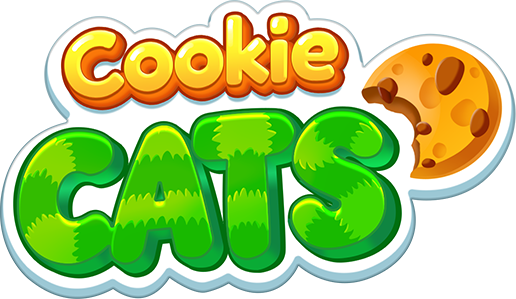

In [432]:
img2 = Image.open('Cookie-Cats-Logo.png')
img2